In [4]:
import pandas as pd
import numpy as np
import pickle

In [5]:

df = pickle.load(open('final_set.pkl', 'rb'))

In [6]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


I need
1) Batting_team
2) bowling_team
3) current_score
4) wicket_left
5) current_run_rate
6) city
7) balls_left
8) last_five_overs_run

In [7]:
df.head(1)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground


In [8]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [9]:
df[df['city'].isnull()]['venue'].value_counts()

venue
Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: count, dtype: int64

In [10]:
df.head(1)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground


In [11]:
cities = np.where(df['city'].isnull(), df['venue'].str.split().apply(lambda x:x[0]), df['city'])

In [12]:
df['city'] = cities

In [13]:
df['city'].isnull().sum()

0

In [14]:
df.drop(columns=['venue'], inplace=True)

In [15]:
df.head(1)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne


In [16]:
e_cities = df['city'].value_counts()[df['city'].value_counts() > 500].index.tolist()

In [17]:
df[df['city'].isin(e_cities)]

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [18]:
df.head(1)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne


In [19]:
df['current_score'] = df.groupby('match_id')['runs'].cumsum()

In [20]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [21]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])

In [22]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [23]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df["ball_no"].astype('int')

In [24]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [25]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)

In [26]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [27]:

df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)

In [28]:
df['player_dismissed'] = df['player_dismissed'].astype('int')

In [29]:
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()

In [30]:
df['wicket_left'] = 10 - df['player_dismissed']

In [31]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wicket_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [32]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

In [33]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wicket_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [34]:
df['batting_team'].unique()

array(['Australia', 'Bangladesh', 'New Zealand', 'South Africa',
       'England', 'West Indies', 'India', 'Pakistan', 'Afghanistan',
       'Sri Lanka'], dtype=object)

In [35]:
gp = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for i in match_ids:
    last_five.extend(gp.get_group(i).rolling(window=30)['runs'].sum().values.tolist())

In [36]:
last_five

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 43.0,
 44.0,
 45.0,
 44.0,
 42.0,
 43.0,
 41.0,
 41.0,
 41.0,
 42.0,
 42.0,
 39.0,
 38.0,
 39.0,
 38.0,
 39.0,
 40.0,
 37.0,
 41.0,
 42.0,
 42.0,
 44.0,
 44.0,
 40.0,
 39.0,
 37.0,
 35.0,
 31.0,
 27.0,
 26.0,
 31.0,
 31.0,
 30.0,
 31.0,
 31.0,
 32.0,
 31.0,
 31.0,
 36.0,
 37.0,
 37.0,
 37.0,
 37.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 32.0,
 32.0,
 31.0,
 29.0,
 29.0,
 31.0,
 32.0,
 32.0,
 32.0,
 33.0,
 36.0,
 37.0,
 37.0,
 39.0,
 41.0,
 40.0,
 41.0,
 41.0,
 42.0,
 44.0,
 39.0,
 43.0,
 45.0,
 48.0,
 48.0,
 48.0,
 49.0,
 49.0,
 49.0,
 51.0,
 51.0,
 51.0,
 52.0,
 52.0,
 53.0,
 53.0,
 53.0,
 54.0,
 53.0,
 52.0,
 50.0,
 53.0,
 47.0,
 46.0,
 45.0,
 46.0,
 47.0,
 49.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [37]:
df['last_five'] = last_five

In [38]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wicket_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [39]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df, on='match_id')

In [40]:
final_df

,match_id,runs_x,batting_team,bowling_team,ball,runs_y,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wicket_left,crr,last_five
0,2,168,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,168,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,168,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,168,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,168,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,128,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
63884,964,128,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
63885,964,128,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
63886,964,128,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [41]:
final_df = final_df[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left', 'wicket_left', 'crr', 'last_five', 'runs_x']]

In [42]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,crr,last_five,runs_x
0,Australia,Sri Lanka,Melbourne,0,119,10,0.000000,NaN,168
1,Australia,Sri Lanka,Melbourne,0,118,10,0.000000,NaN,168
2,Australia,Sri Lanka,Melbourne,1,117,10,2.000000,NaN,168
3,Australia,Sri Lanka,Melbourne,3,116,10,4.500000,NaN,168
4,Australia,Sri Lanka,Melbourne,3,115,10,3.600000,NaN,168
...,...,...,...,...,...,...,...,...,...
63883,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128
63884,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128
63885,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128
63886,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128


In [43]:
final_df.dropna(inplace=True)

C:\Users\AKSHAT\AppData\Local\Temp\ipykernel_18184\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [44]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,crr,last_five,runs_x
29,Australia,Sri Lanka,Melbourne,43,90,10,8.600000,43.0,168
30,Australia,Sri Lanka,Melbourne,44,89,10,8.516129,44.0,168
31,Australia,Sri Lanka,Melbourne,45,88,10,8.437500,45.0,168
32,Australia,Sri Lanka,Melbourne,45,87,10,8.181818,44.0,168
33,Australia,Sri Lanka,Melbourne,45,86,10,7.941176,42.0,168
...,...,...,...,...,...,...,...,...,...
63883,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128
63884,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128
63885,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128
63886,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128


In [45]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wicket_left      0
crr              0
last_five        0
runs_x           0
dtype: int64

Doing Shuffling to remove biasness

In [46]:
final_df = final_df.sample(final_df.shape[0])

In [47]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,crr,last_five,runs_x
50189,Sri Lanka,Pakistan,Dubai,53,71,8,6.489796,33.0,145
24142,New Zealand,India,Johannesburg,110,33,5,7.586207,37.0,190
29200,Sri Lanka,Pakistan,London,92,47,8,7.561644,18.0,150
30894,New Zealand,West Indies,Auckland,57,74,8,7.434783,36.0,155
19048,England,Australia,Southampton,66,63,8,6.947368,45.0,145
...,...,...,...,...,...,...,...,...,...
23359,West Indies,South Africa,Johannesburg,84,70,10,10.080000,54.0,205
34988,West Indies,Australia,St Lucia,67,56,5,6.281250,27.0,105
16262,India,West Indies,Mumbai,138,46,9,11.189189,52.0,240
20258,Bangladesh,Pakistan,Lahore,45,68,7,5.192308,24.0,136


In [48]:
final_df.head(2)

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,crr,last_five,runs_x
50189,Sri Lanka,Pakistan,Dubai,53,71,8,6.489796,33.0,145
24142,New Zealand,India,Johannesburg,110,33,5,7.586207,37.0,190


In [49]:
x = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']

In [50]:
x

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,crr,last_five
50189,Sri Lanka,Pakistan,Dubai,53,71,8,6.489796,33.0
24142,New Zealand,India,Johannesburg,110,33,5,7.586207,37.0
29200,Sri Lanka,Pakistan,London,92,47,8,7.561644,18.0
30894,New Zealand,West Indies,Auckland,57,74,8,7.434783,36.0
19048,England,Australia,Southampton,66,63,8,6.947368,45.0
...,...,...,...,...,...,...,...,...
23359,West Indies,South Africa,Johannesburg,84,70,10,10.080000,54.0
34988,West Indies,Australia,St Lucia,67,56,5,6.281250,27.0
16262,India,West Indies,Mumbai,138,46,9,11.189189,52.0
20258,Bangladesh,Pakistan,Lahore,45,68,7,5.192308,24.0


In [51]:
y

50189    145
24142    190
29200    150
30894    155
19048    145
        ... 
23359    205
34988    105
16262    240
20258    136
9665     188
Name: runs_x, Length: 48645, dtype: int64

Spliting the data

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

Now i have three columns 'batting_team', 'bowling_team' and 'city' are string typpe and others are numneric so i have to use OneHotEncoder here to convert string to numeric value then i have to scale the data to remove the bias and then i apply the dataset to the model

Here i use these models that can be used for predicting runs
1) Linear Regression
2) Decision Tree
3) Random Forest
4) SVR
5) XGBoost

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error


In [51]:
s_to_n = ColumnTransformer([
    ('s_to_n', OneHotEncoder(sparse=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

In [52]:
pipe1 = Pipeline(steps=[
    ('step1', s_to_n),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators = 1000, learning_rate = 0.2, max_depth = 12, random_state=1))
])

XGBRegressor

In [53]:
pipe1.fit(x_train, y_train)
y_pred = pipe1.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

c:\Users\AKSHAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9888481146788425
1.5642789949896843


In [54]:
y_test

41023    132
25986    186
466      141
13064    195
42159    179
        ... 
54194    165
23232    169
17730    167
58647    142
40398    113
Name: runs_x, Length: 9729, dtype: int64

In [55]:
print(y_pred[0])

133.9005


In [56]:
pipe2 = Pipeline(steps=[
    ('step1', s_to_n),
    ('step2', StandardScaler()),
    ('step3', LinearRegression())
])

LinearRegression

In [57]:
pipe2.fit(x_train, y_train)
y1_pred = pipe2.predict(x_test)
print(r2_score(y_test, y1_pred))
print(mean_absolute_error(y_test, y1_pred))

c:\Users\AKSHAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7076796661042171
13.005047905466354


In [58]:
pipe3 = Pipeline(steps=[
    ('step1', s_to_n),
    ('step2', StandardScaler()),
    ('step3', RandomForestRegressor(max_depth=20, n_estimators=1000))
])

RandomForestRegressor

In [59]:
pipe3.fit(x_train, y_train)
y2_pred = pipe3.predict(x_test)
print(r2_score(y_test, y2_pred))
print(mean_absolute_error(y_test, y2_pred))

c:\Users\AKSHAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
pipe4 = Pipeline(steps=[
    ('step1', s_to_n),
    ('step2', StandardScaler()),
    ('step3', DecisionTreeRegressor(max_depth=30))
])

DecisionTreeRegressor

In [ ]:
pipe4.fit(x_train, y_train)
y3_pred = pipe4.predict(x_test)
print(r2_score(y_test, y3_pred))
print(mean_absolute_error(y_test, y3_pred))

c:\Users\AKSHAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9282931284745736
2.955228530237677


In [ ]:
pipe5 = Pipeline(steps=[
    ('step1', s_to_n),
    ('step2', StandardScaler()),
    ('step3', SVR(kernel='linear'))
])

In [ ]:
pipe5.fit(x_train, y_train)
y4_pred = pipe5.predict(x_test)
print(r2_score(y_test, y4_pred))
print(mean_absolute_error(y_test, y4_pred))

c:\Users\AKSHAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.6913951382208661
12.548756622279729


Here i Dump Pipe1 because in pipe1 XGBRegressor is used which have best r2_score and less mean_absolute_error so i use XGBRegressor For the application

In [60]:
pickle.dump(pipe1, open('modelXGB.pkl', 'wb'))

In [2]:
import pickle
pipe = pickle.load(open('modelXGB.pkl', 'rb'))

In [55]:
y_pred = pipe.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9979869813404528
0.32862137527771657


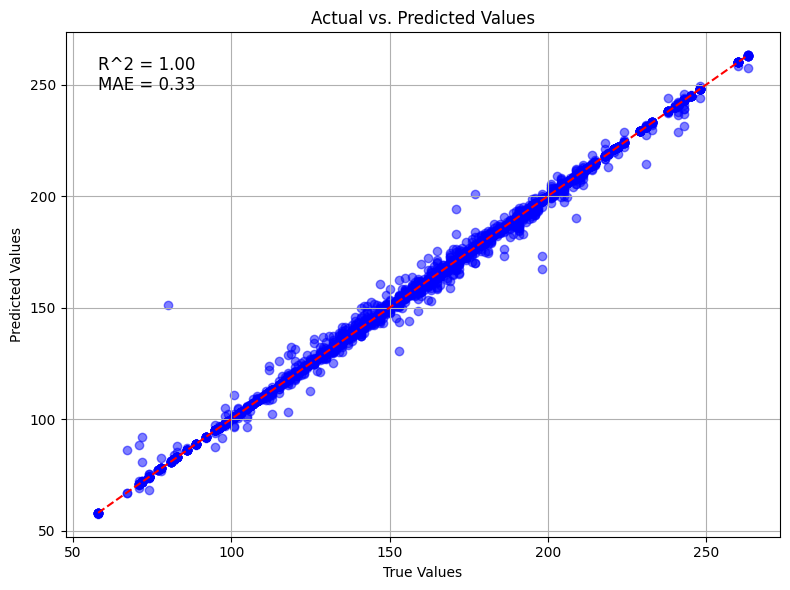

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming y_test and y_pred are already defined
# y_pred = pipe.predict(x_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.text(min(y_test), max(y_test), f'R^2 = {r2:.2f}\nMAE = {mae:.2f}', fontsize=12, verticalalignment='top')
plt.grid(True)
plt.tight_layout()
plt.show()


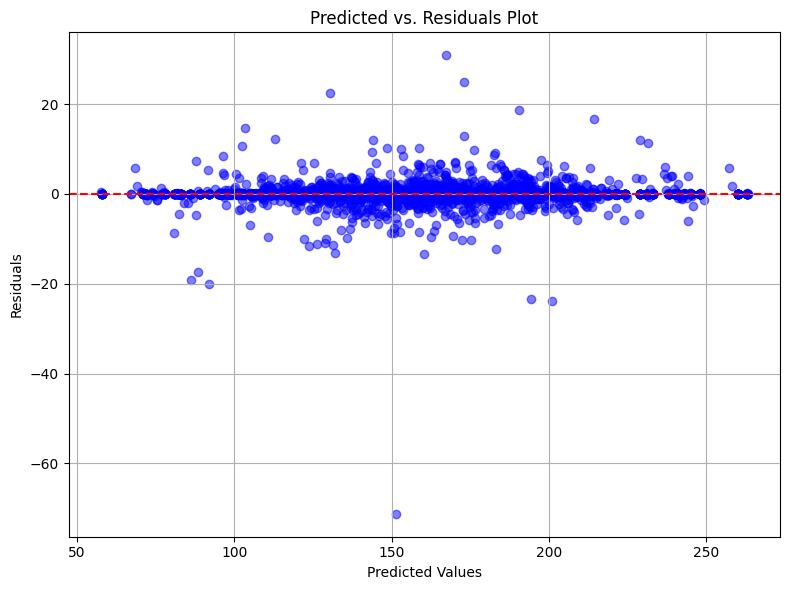

In [60]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create predicted vs. residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


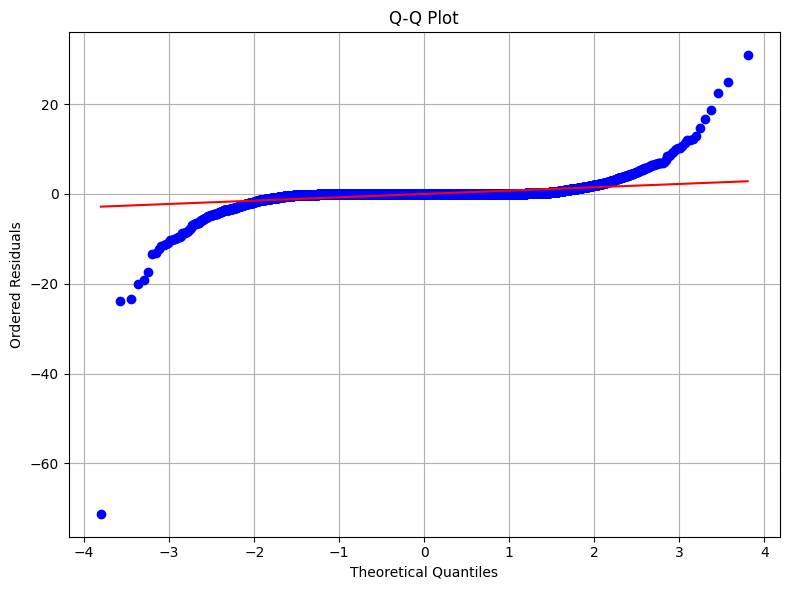

In [61]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.title('Q-Q Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


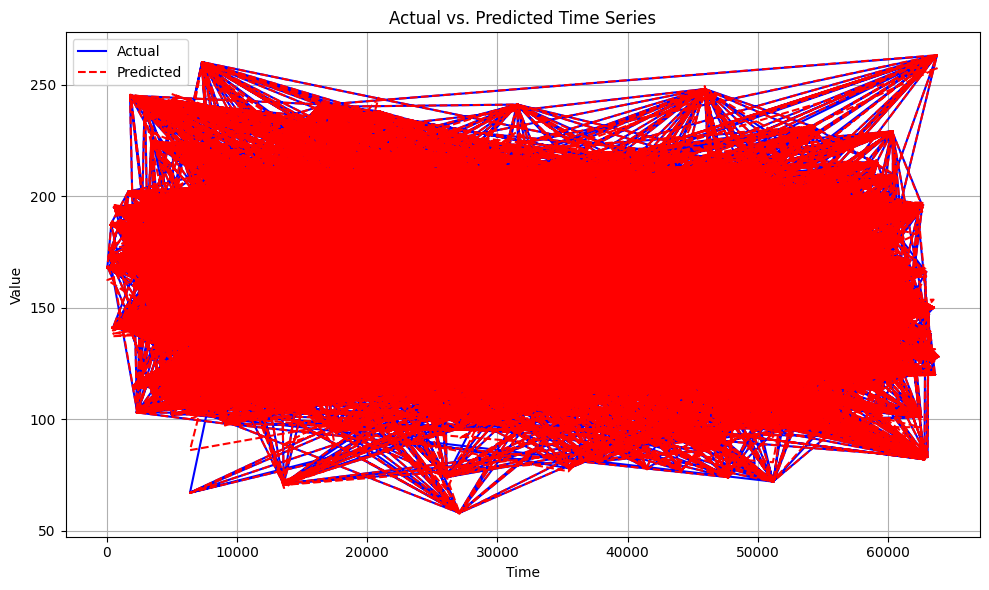

In [62]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are time-series data
# y_pred = pipe.predict(x_test)

# Create time series plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
e_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad',
 'Brisbane',
 'Birmingham',
 'Hambantota',
 'Dhaka',
 'Lucknow']

In [63]:
x.head()

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,crr,last_five
27201,Pakistan,Bangladesh,Karachi,48,90,8,9.600000,47.0
21648,South Africa,England,Cape Town,77,50,7,6.600000,31.0
34149,New Zealand,Pakistan,Barbados,103,25,5,6.505263,36.0
38832,West Indies,Pakistan,St Lucia,124,22,7,7.591837,26.0
49886,South Africa,Australia,Centurion,124,3,3,6.358974,42.0
